## Question 2 

### Question 2. 1

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 

In [3]:
import tensorflow as tf

In [4]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.5.0
Eager execution: True


In [5]:
data = pd.read_csv("iris.data", sep=",")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   sepal length  sepal width  petal length  petal width Species
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [8]:
data.head(15)

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
data.to_csv('file_name.csv')

In [10]:
data = pd.read_csv("file_name.csv", sep=",")

In [11]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [12]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Examples of y
 [0 0 0]


In [14]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

In [15]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.07056264 0.09265065 0.02754646 0.01150299]
 [0.06779548 0.07941484 0.02754646 0.01150299]
 [0.06502832 0.08470916 0.02557886 0.01150299]]


In [16]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [17]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils

In [18]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [42]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu')) # hidden layer 1
#model.add(Dense(500,activation='relu'))
#model.add(Dense(300,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax')) # output layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 3003      
Total params: 8,003
Trainable params: 8,003
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 1s 44ms/step - loss: 1.0980 - accuracy: 0.4525 - val_loss: 1.1107 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0954 - accuracy: 0.4293 - val_loss: 1.1221 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0923 - accuracy: 0.4154 - val_loss: 1.1344 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0904 - accuracy: 0.4192 - val_loss: 1.1467 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0879 - accuracy: 0.3902 - val_loss: 1.1591 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 1.0841 - accuracy: 0.4336 - val_loss: 1.1716 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 0s 4ms/step - loss: 1.0794 - accuracy: 0.4455 - val_loss: 1.1837 - val_accuracy: 0.0000e+00
Epoch

In [41]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 0.0


## Question 2.2

In [86]:
model=Sequential()
model.add(Dense(8,input_dim=4,activation=tf.nn.selu)) # hidden layer 1 with 8 neurons
model.add(Dense(4,activation=tf.nn.selu)) # hidden layer 2 with 4 neurons
model.add(Dense(4,activation=tf.nn.selu)) # hidden layer 3 with 4 neurons
#model.add(Dropout(0.2))
model.add(Dense(3,activation=tf.nn.softmax)) # output layer with 3 neurons
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_64 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_65 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_66 (Dense)             (None, 3)                 15        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


### Selu activation functions is giving better results. There are 111 trainable params

In [92]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1150 - accuracy: 0.9833 - val_loss: 0.3541 - val_accuracy: 0.9000
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1145 - accuracy: 0.9833 - val_loss: 0.3857 - val_accuracy: 0.8333
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1127 - accuracy: 0.9833 - val_loss: 0.3756 - val_accuracy: 0.8667
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1113 - accuracy: 0.9833 - val_loss: 0.3349 - val_accuracy: 0.9333
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1109 - accuracy: 0.9833 - val_loss: 0.3527 - val_accuracy: 0.9000
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.1088 - accuracy: 0.9833 - val_loss: 0.3352 - val_accuracy: 0.9333
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.1081 - accuracy: 0.9833 - val_loss: 0.3400 - val_accuracy: 0.9000
Epoch 8/100
6/6 [==========

6/6 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.9667 - val_loss: 0.2595 - val_accuracy: 0.9333
Epoch 60/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9833 - val_loss: 0.3468 - val_accuracy: 0.8333
Epoch 61/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0738 - accuracy: 0.9833 - val_loss: 0.2871 - val_accuracy: 0.9333
Epoch 62/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0721 - accuracy: 0.9833 - val_loss: 0.2514 - val_accuracy: 0.9333
Epoch 63/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.2483 - val_accuracy: 0.9333
Epoch 64/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9750 - val_loss: 0.2618 - val_accuracy: 0.9333
Epoch 65/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.9833 - val_loss: 0.2629 - val_accuracy: 0.9333
Epoch 66/100
6/6 [===============

In [93]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 93.33333333333333


## print the weights

In [98]:
print(len(model.layers))
i = 0
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(i)
    print(layer.get_weights())
    i = i+1
print(layer.output)

4
0
[array([[ 0.3980298 , -0.21202025, -0.12870696,  0.14347744, -0.11353484,
         0.7654841 , -0.05959228,  0.21673448],
       [ 0.2642551 ,  0.75340503,  0.1346493 ,  0.07460888,  0.87218535,
        -0.15375419, -0.02299385,  0.8147147 ],
       [ 0.20779182, -0.61966527,  0.4992647 ,  0.1760462 , -0.45896748,
        -0.13320202, -1.3434908 , -1.0782462 ],
       [-0.51195234, -1.1252613 ,  1.1401566 ,  0.9772092 , -0.30481744,
        -0.09813596, -1.4453299 , -0.7720094 ]], dtype=float32), array([ 0.1147338 ,  0.00495205, -0.10467829, -0.18932424,  0.24394582,
        0.1124351 ,  0.07646918, -0.01181397], dtype=float32)]
1
[array([[-0.17177652,  0.73077404, -0.89479154, -0.32795933],
       [-0.9733699 , -1.3141218 , -0.65585214,  0.95531005],
       [ 1.3478805 ,  1.2838937 ,  0.45745713, -0.45810616],
       [ 0.04698862,  0.7939335 ,  0.62778914, -1.0098431 ],
       [-0.672034  ,  0.539001  , -0.7754666 ,  0.51265925],
       [ 0.47864392,  0.20973727, -0.35838002,  0.3

## Schematic diagram 

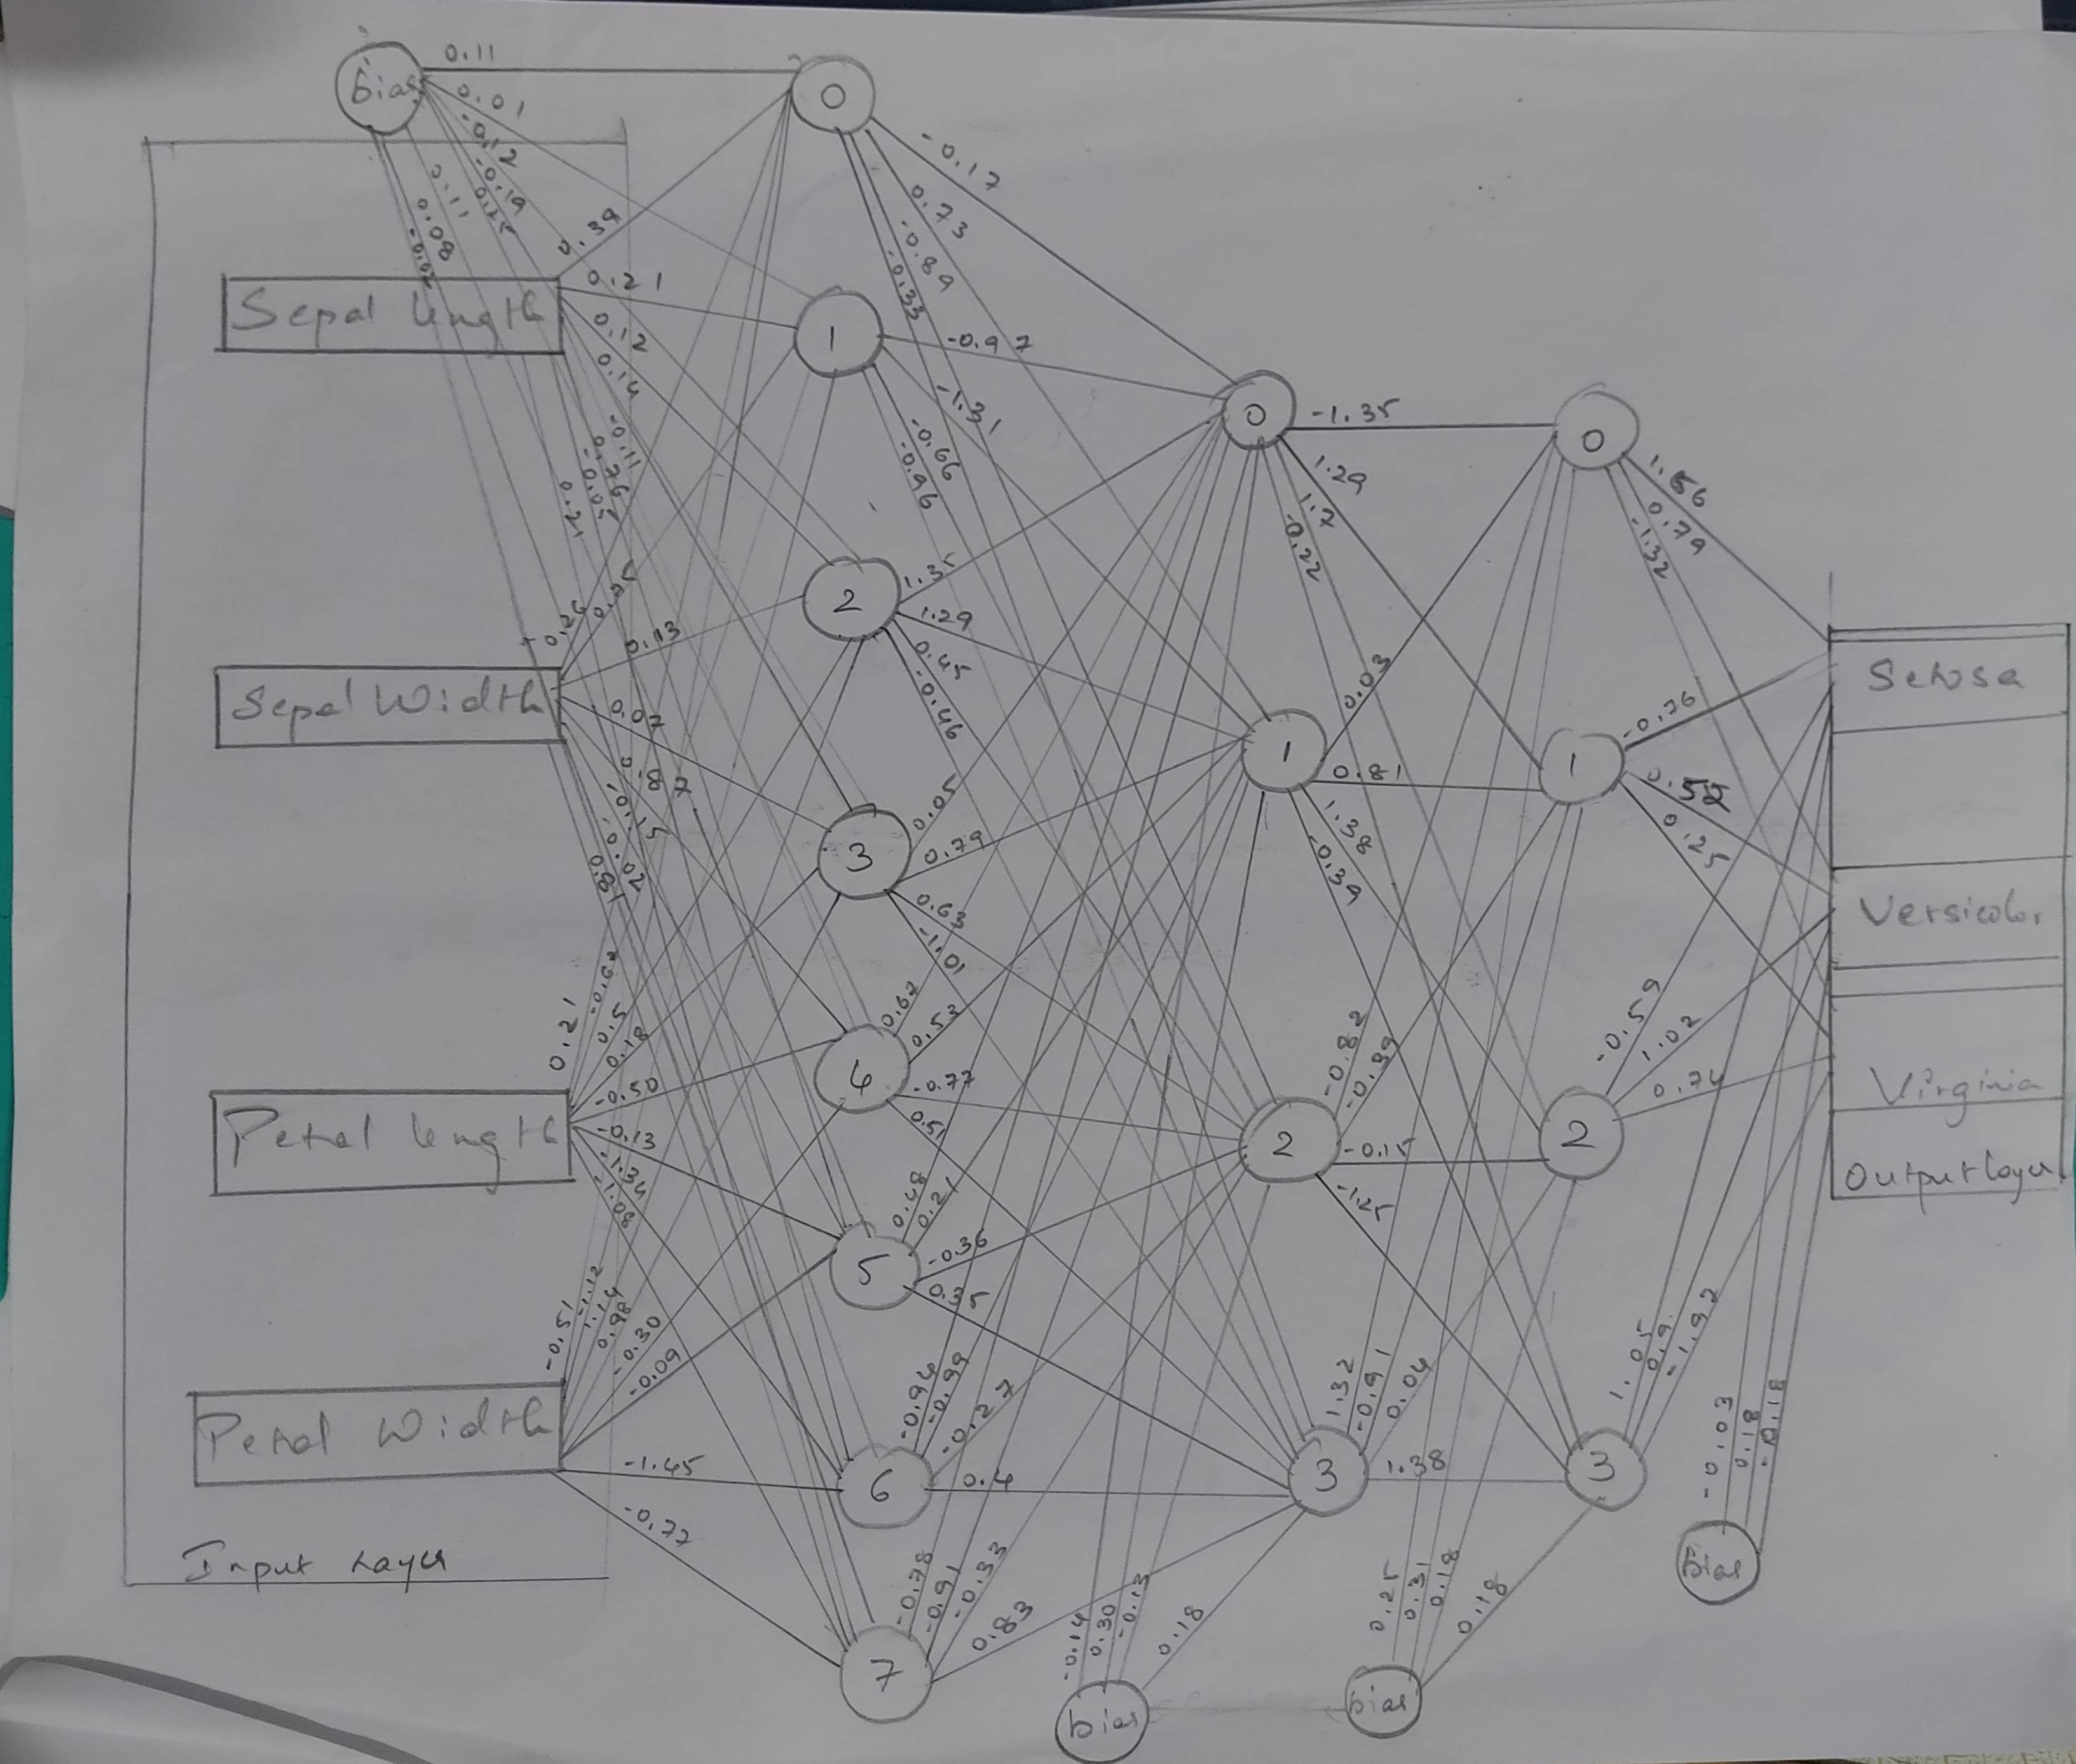